<h1><center>Smart Sport ML</center></h1>





# Randomforest Classifier 


**Data Preprocessing**


In [ ]:
import pandas as pd
matches=pd.read_csv('matches.csv')
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
matches[pd.isnull(matches['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [ ]:
matches['winner'].fillna('Draw', inplace=True)

In [ ]:
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [ ]:
print(matches.team1.unique())

2     109
9     100
6      92
5      84
8      82
10     75
7      67
1      58
11     29
14     15
3      13
13     12
15     10
12      6
16      4
Name: winner, dtype: int64


In [ ]:
matches['city'].fillna('Dubai',inplace=True)

In [ ]:
L1=list(matches['team1'].unique())
print(L1)

['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions', 'Rising Pune Supergiant', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']


In [ ]:
L2=list(matches['city'].unique())
print(L2)

['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai', 'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi', 'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', 'Dubai', 'Mohali', 'Bengaluru']


In [ ]:
matches.replace(list(matches['team1'].unique()),['SRH','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS','DCA'],inplace=True)

In [ ]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### **Data Encoding**

In [ ]:
encode = {'team1': {'SRH':1 ,'MI':2,'GL':3,'RPS':4,'RCB':5,'KKR':6,'DD':7,'KXIP':8,'CSK':9,'RR':10,'DC':11,'KTK':12,'PW':13,'RPS':14,'DCA':15},
          'team2': {'SRH':1 ,'MI':2,'GL':3,'RPS':4,'RCB':5,'KKR':6,'DD':7,'KXIP':8,'CSK':9,'RR':10,'DC':11,'KTK':12,'PW':13,'RPS':14,'DCA':15},
          'toss_winner': {'SRH':1 ,'MI':2,'GL':3,'RPS':4,'RCB':5,'KKR':6,'DD':7,'KXIP':8,'CSK':9,'RR':10,'DC':11,'KTK':12,'PW':13,'RPS':14,'DCA':15},
          'winner': {'SRH':1 ,'MI':2,'GL':3,'RPS':4,'RCB':5,'KKR':6,'DD':7,'KXIP':8,'CSK':9,'RR':10,'DC':11,'KTK':12,'PW':13,'RPS':14,'DCA':15,'Draw':16},
          'city' : {'Hyderabad':1,'Pune':2,'Rajkot':3,'Indore':4,'Bangalore':5,'Mumbai':6,'Kolkata':7,'Delhi':8,'Chandigarh':9,'Kanpur':10,'Jaipur':11,'Chennai':12,'Cape Town':13,'Port Elizabeth':14,'Durban':15,'Centurion':16,'East London':17,'Johannesburg':18,'Kimberley':19,'Bloemfontein':20,'Ahmedabad':21,'Cuttack':22,'Nagpur':23,'Dharamsala':24,'Kochi':25,'Visakhapatnam':26,'Raipur':27,'Ranchi':28,'Abu Dhabi':29,'Sharjah':30,'Dubai':31,'Mohali':32,'Bengaluru':33 }}
matches.replace(encode, inplace=True)

In [ ]:
matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,1,2017-04-05,1,5,5,field,normal,0,1,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,2,2017-04-06,2,14,14,field,normal,0,14,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,3,2017-04-07,3,6,6,field,normal,0,6,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,4,2017-04-08,14,8,8,field,normal,0,8,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,5,2017-04-08,5,7,5,bat,normal,0,5,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,1,2017-04-09,3,1,1,field,normal,0,1,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,6,2017-04-09,6,2,2,field,normal,0,2,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,4,2017-04-10,5,8,5,bat,normal,0,8,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,2,2017-04-11,7,14,14,field,normal,0,7,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,6,2017-04-12,1,2,2,field,normal,0,2,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [ ]:
matches.describe()

,id,season,city,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,10.211640,6.679894,6.907407,6.896825,0.025132,6.657407,13.283069,3.350529
std,3464.478148,3.366895,8.015063,3.474512,3.374528,3.413249,0.156630,3.502557,23.471144,3.387963
min,1.000000,2008.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,189.750000,2011.000000,6.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,0.000000
50%,378.500000,2013.000000,8.000000,7.000000,7.000000,7.000000,0.000000,7.000000,0.000000,4.000000
75%,567.250000,2016.000000,12.000000,9.000000,9.000000,9.000000,0.000000,9.000000,19.000000,6.000000
max,11415.000000,2019.000000,33.000000,15.000000,15.000000,15.000000,1.000000,16.000000,146.000000,10.000000


### **Data Analysis**

In [ ]:
matches = matches[['team1','team2','city','toss_winner','winner']]
matches.head(2)

,team1,team2,city,toss_winner,winner
0,1,5,1,5,1
1,2,14,2,14,14


In [ ]:
df = pd.DataFrame(matches)
df.describe()

,team1,team2,city,toss_winner,winner
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,6.679894,6.907407,10.211640,6.896825,6.657407
std,3.474512,3.374528,8.015063,3.413249,3.502557
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,6.000000,5.000000,5.000000
50%,7.000000,7.000000,8.000000,7.000000,7.000000
75%,9.000000,9.000000,12.000000,9.000000,9.000000
max,15.000000,15.000000,33.000000,15.000000,16.000000


In [ ]:
dicVal = encode['winner']
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)
#Mumbai won most toss and also most matches
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
MI -> 98
KKR -> 92
CSK -> 89
KXIP -> 81
RCB -> 81
RR -> 80
DD -> 80
SRH -> 46
DC -> 43
PW -> 20
GL -> 15
RPS -> 13
DCA -> 10
KTK -> 8
No of match winners by each team
MI -> 109
CSK -> 100
KKR -> 92
RCB -> 84
KXIP -> 82
RR -> 75
DD -> 67
SRH -> 58
DC -> 29
RPS -> 15
GL -> 13
PW -> 12
DCA -> 10
KTK -> 6
Draw -> 4


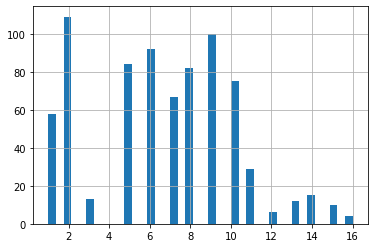

In [ ]:
#it shows that the MI(2) team won most matches 
df['winner'].hist(bins=40)

Text(0.5, 1.0, 'Match winners')

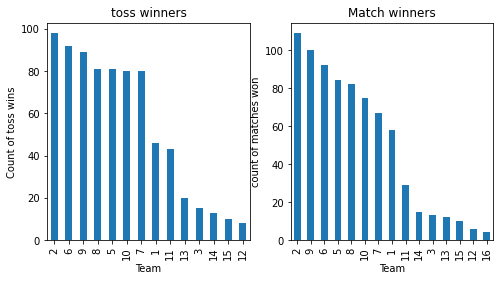

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

In [ ]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

team1          0
team2          0
city           0
toss_winner    0
winner         0
dtype: int64

In [ ]:
df

,team1,team2,city,toss_winner,winner
0,1,5,1,5,1
1,2,14,2,14,14
2,3,6,3,6,6
3,14,8,4,8,8
4,5,7,5,5,5
...,...,...,...,...,...
751,6,2,6,2,2
752,9,2,12,9,2
753,1,15,26,15,15
754,15,9,26,9,9


In [ ]:
df['label']= df.team1 == df.winner

In [ ]:
df.label=df.label.astype(int)

In [ ]:
df.drop('winner',axis=1,inplace=True)

In [ ]:
df

,team1,team2,city,toss_winner,label
0,1,5,1,5,1
1,2,14,2,14,0
2,3,6,3,6,0
3,14,8,4,8,0
4,5,7,5,5,1
...,...,...,...,...,...
751,6,2,6,2,0
752,9,2,12,9,0
753,1,15,26,15,0
754,15,9,26,9,0


In [ ]:
import numpy as np
labels = np.array(df['label'])
features = df.drop('label', axis = 1)
feature_list = list(features.columns)
df = np.array(features)
print(len(feature_list))

4


### **Split data**

In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(df, labels, test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (567, 4)
Training Labels Shape: (567,)
Testing Features Shape: (189, 4)
Testing Labels Shape: (189,)


### **Train Model**

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 10000 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
print(predictions.shape)

(189,)


In [ ]:
test_labels.shape
pred=predictions > 0.5

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,pred )

0.5555555555555556

### **Visualizing the  Decision Tree**

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[4]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[4]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

### **Variable Importances**

In [ ]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: team2                Importance: 0.29
Variable: team1                Importance: 0.28
Variable: toss_winner          Importance: 0.24
Variable: city                 Importance: 0.19


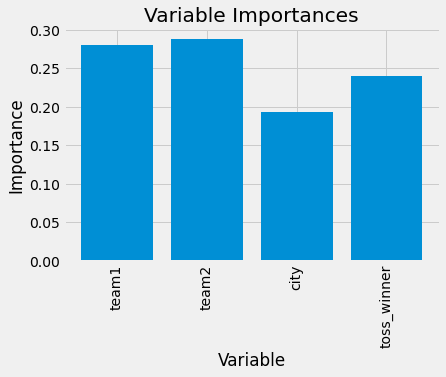

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Support Vector Machine Classifier

We allready read the data 

Shape of dataset


In [ ]:
print(df.shape)

(756, 4)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size = 0.3, random_state = 109)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(529, 4)
(529,)


In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC 
#defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
#fitting the model for grid search 
grid.fit(X_train, y_train) 

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 
#Model after hyper-parameter tuning 
print(grid.best_estimator_) 
accuracy = grid.best_score_
print("test accuracy",accuracy)

{'C': 100, 'gamma': 0.2, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
test accuracy 0.4348966756513926


Evaluating the Model


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
grid_predictions = grid.predict(X_test) 
# print classification report 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           1       0.55      0.73      0.63        22
           2       0.60      0.74      0.67        43
           3       0.33      0.50      0.40         2
           5       0.48      0.52      0.50        27
           6       0.41      0.58      0.48        19
           7       0.33      0.09      0.14        22
           8       0.56      0.38      0.45        26
           9       0.73      0.47      0.57        34
          10       0.33      0.53      0.41        17
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         4
          14       0.25      0.40      0.31         5
          15       0.00      0.00      0.00         3

    accuracy                           0.50       227
   macro avg       0.33      0.35      0.33       227
weighted avg       0.50      0.50      0.48       227



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Neural Network

In [ ]:
import numpy as np
import keras
from keras.utils import to_categorical, plot_model
from keras import Sequential
from keras import losses
from keras.layers import Dense
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, log_loss, recall_score

In [ ]:
import numpy as np
labels = np.array(df['label'])
features = df.drop('label', axis = 1)

In [ ]:
print(labels)
print(features)

[1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0
 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1
 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0
 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0
 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1
 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1
 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1
 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0
 1 0 1 0 1 1 1 0 0 0 0 0 

In [ ]:
labels = to_categorical(labels)

In [ ]:
labels

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 109)

In [ ]:
model = Sequential()
model.add(Dense(64, activation="relu", input_dim=features.shape[1]))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss=losses.categorical_crossentropy, metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_29 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 34        
Total params: 2,962
Trainable params: 2,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, y_train, epochs=200, validation_data=(X_test,y_test), batch_size=16)

Epoch 1/200
38/38 [==============================] - 0s 5ms/step - loss: 0.7155 - accuracy: 0.5050 - val_loss: 0.6824 - val_accuracy: 0.5526
Epoch 2/200
38/38 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.5513 - val_loss: 0.6661 - val_accuracy: 0.5592
Epoch 3/200
38/38 [==============================] - 0s 2ms/step - loss: 0.7063 - accuracy: 0.5248 - val_loss: 0.6645 - val_accuracy: 0.5592
Epoch 4/200
38/38 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5795 - val_loss: 0.6665 - val_accuracy: 0.5987
Epoch 5/200
38/38 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5778 - val_loss: 0.6635 - val_accuracy: 0.6053
Epoch 6/200
38/38 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5712 - val_loss: 0.6560 - val_accuracy: 0.5987
Epoch 7/200
38/38 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5745 - val_loss: 0.6543 - val_accuracy: 0.5855
Epoch 8/200
3

In [ ]:
evaluate = model.evaluate(X_test, y_test)
print ("Loss: ", evaluate[0])
print ("Accuracy on the test set: ", evaluate[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.7495 - accuracy: 0.5855
Loss:  0.749477207660675
Accuracy on the test set:  0.5855262875556946


In [ ]:
model.save("model.h5")